In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
import numpy as np



In [ ]:
gpu = len(tf.config.list_physical_devices('GPU'))>0

In [7]:
gpu

False

In [8]:
len(tf.config.list_physical_devices('GPU'))

0

In [36]:
train,val = tf.keras.utils.image_dataset_from_directory('veggie_heap_training',
                                                        labels='inferred',
                                                        validation_split=0.3,
                                                        subset="both",
                                                        color_mode='rgb',
                                                        seed =7,
                                                        shuffle=True,
                                                        batch_size=32,
                                                        image_size=(256, 256))

test = tf.keras.utils.image_dataset_from_directory('veggie_heap_testing',
                                                    labels='inferred',
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    image_size=(256, 256))


Found 9835 files belonging to 12 classes.
Using 6885 files for training.
Using 2950 files for validation.
Found 2424 files belonging to 12 classes.


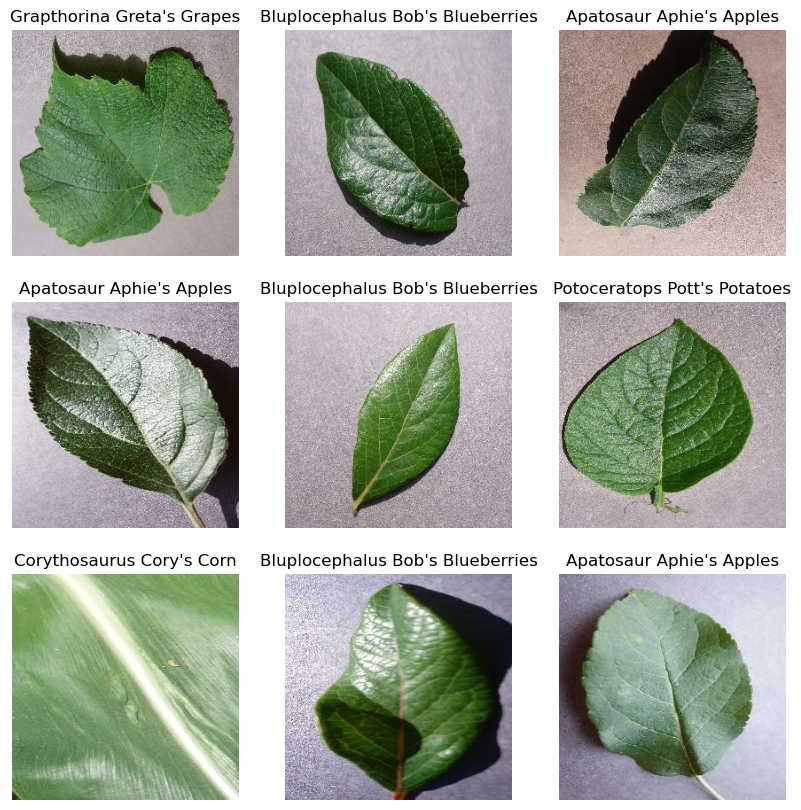

In [37]:
image_batch, label_batch = next(iter(train))
class_names = train.class_names


plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [11]:

val = val.map(lambda x,y: (x/255, y))
test = test.map(lambda x,y: (x/255, y))
train = train.map(lambda x,y: (x/255, y))

In [12]:
model = Sequential()

In [13]:

model.add(Conv2D(filters = 128,kernel_size = (3,3),activation='relu', input_shape=(256,256,3),strides=(1, 1),padding='valid'))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 128,kernel_size = (3,3),activation='relu', input_shape=(256,256,3),strides=(1, 1),padding='valid'))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 128,kernel_size = (3,3), activation='relu', input_shape=(256,256,3),strides=(1, 1),padding='valid'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))

In [14]:
model.compile('adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [18]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
216/216 [==============================] - 1574s 7s/step - loss: 0.9772 - accuracy: 0.6741 - val_loss: 0.4279 - val_accuracy: 0.8580
Epoch 2/5
216/216 [==============================] - 9385s 44s/step - loss: 0.3058 - accuracy: 0.8983 - val_loss: 0.2922 - val_accuracy: 0.9122
Epoch 3/5
216/216 [==============================] - 1686s 8s/step - loss: 0.2104 - accuracy: 0.9298 - val_loss: 0.2431 - val_accuracy: 0.9234
Epoch 4/5
216/216 [==============================] - 5195s 24s/step - loss: 0.1132 - accuracy: 0.9598 - val_loss: 0.1870 - val_accuracy: 0.9461
Epoch 5/5
216/216 [==============================] - 1368s 6s/step - loss: 0.1009 - accuracy: 0.9660 - val_loss: 0.1790 - val_accuracy: 0.9495


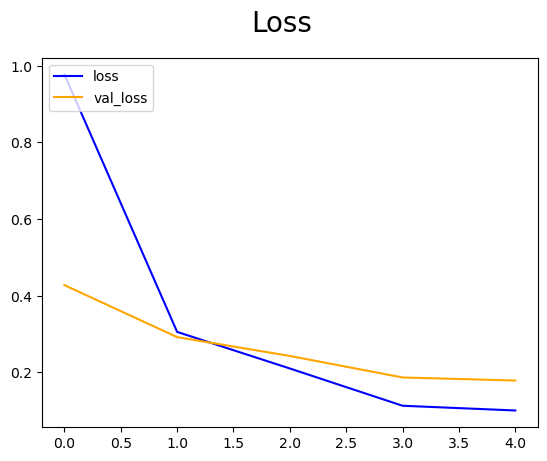

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

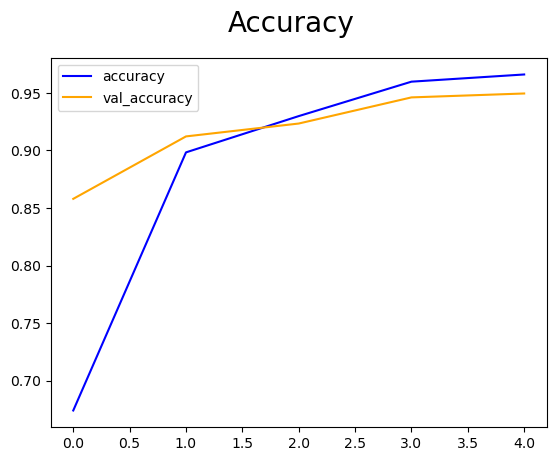

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
predictions = model.predict(test)


76/76 [==============================] - 131s 2s/step


In [25]:
predicted_labels = np.argmax(predictions, axis=-1)


In [26]:
true_labels = []
for images, labels in test:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score,classification_report

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print("Accuracy:", accuracy)
print(classification_report(true_labels, predicted_labels, target_names=class_names))


Precision: 0.08981750607394563
Recall: 0.08333333333333333
F1-score: 0.0803274696500996
Confusion Matrix:
Accuracy: 0.08333333333333333
                                    precision    recall  f1-score   support

          Apatosaur Aphie's Apples       0.08      0.16      0.11       200
  Bluplocephalus Bob's Blueberries       0.07      0.14      0.09       200
    Cherizinoasaur Cher's Cherries       0.09      0.09      0.09       200
         Corythosaurus Cory's Corn       0.08      0.08      0.08       217
        Grapthorina Greta's Grapes       0.00      0.00      0.00       150
Pachycephalosaurus Perry's Peaches       0.10      0.02      0.03       199
        Pepteranodon Pep's Peppers       0.10      0.08      0.09       200
      Potoceratops Pott's Potatoes       0.08      0.05      0.06       200
   Rhaspdodon Ribery's Raspberries       0.06      0.08      0.07       122
Stribecosaurus Stan's Strawberries       0.05      0.06      0.06       150
            Thyreosaur Tim'

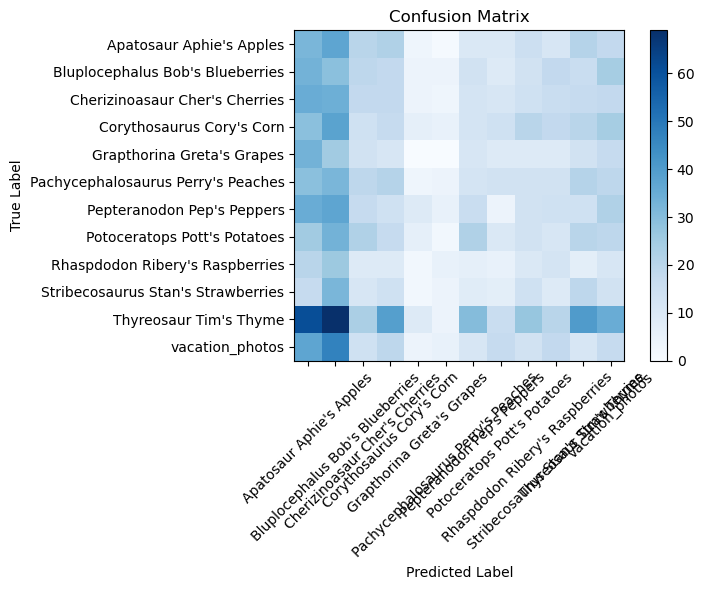

In [41]:
conf_matrix = confusion_matrix(true_labels,  predicted_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [30]:
model.save('model.keras')